In [5]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Candace PC\Desktop\Credit Risk Analytics\Data\Processed\lendingclub_sample.csv', low_memory=False)

Features=Variables 

In [6]:
# Feature 1: Loan amount to income ratio
df['loan_amnt_to_income'] = df['loan_amnt'] / df['annual_inc']

In [7]:
# Feature 2: High interest rate flag (1 if interest rate > 15%)
df['high_int_rate'] = (df['int_rate'] > 15).astype(int)

In [10]:
# Feature 3: Short-term loan flag (1 if loan term is 36 months)
df['short_term_loan'] = df['term'].astype(str).str.contains('36').astype(int)

Here we want to see if everything in our term column is treated like text and scan for 36 so True and False for 60 months.  Output as bianary for modeling . 

In [11]:
# Feature 4: Safer home ownership flag (1 if own or mortgage)
df['has_mortgage_or_own'] = df['home_ownership'].isin(['MORTGAGE', 'OWN']).astype(int)

In [14]:
# Feature 5: Clean employment length (extract number of years)
df['emp_length_clean'] = df['emp_length'].str.extract(r'(\d+)') # Get the digits
df['emp_length_clean'] = df['emp_length_clean'].fillna(0).astype(int)

In [13]:
df[['loan_amnt_to_income', 'high_int_rate', 'short_term_loan', 'has_mortgage_or_own', 'emp_length_clean']].head()

,loan_amnt_to_income,high_int_rate,short_term_loan,has_mortgage_or_own,emp_length_clean
0,0.266667,0,0,1,10
1,0.438356,0,1,0,0
2,0.048193,0,1,1,4
3,0.115865,0,1,0,10
4,0.384615,1,0,1,10


In [15]:
df.to_csv(r'C:\Users\Candace PC\Desktop\Credit Risk Analytics\Data\Processed\lendingclub_features.csv', index=False)

Here we have applied the sample conditions to each person via features and if they meet certain conditions.  Now we will look at the model. 

In [16]:
# Step 1 - Adding features to supply a target. 

features = [
    'loan_amnt_to_income',
    'high_int_rate',
    'short_term_loan',
    'has_mortgage_or_own',
    'emp_length_clean'
]

In [17]:
X = df[features]            # These are the clues we give the model
y = df['loan_default']      # This is the answer we want it to learn

KeyError: 'loan_default'

In [18]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [19]:
# Create a loan_default column created due to not being in data set: 1 if Charged Off (defaulted), 0 if Fully Paid
df['loan_default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [20]:
y = df['loan_default']

Now with the criteria set for loan default we will rerun the model. 

In [22]:
features = [
    'loan_amnt_to_income',
    'high_int_rate',
    'short_term_loan',
    'has_mortgage_or_own',
    'emp_length_clean'
]

X = df[features]            # Variables 
y = df['loan_default']      # Answer (1 = defaulted, 0 = didn't)

In [24]:
from sklearn.model_selection import train_test_split

# Teaching  model with 70%, test it with 30%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [25]:
from sklearn.linear_model import LogisticRegression

# Build and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [26]:
X_train.isnull().sum()

loan_amnt_to_income    3
high_int_rate          0
short_term_loan        0
has_mortgage_or_own    0
emp_length_clean       0
dtype: int64

In [27]:
X_train.dtypes

loan_amnt_to_income    float64
high_int_rate            int32
short_term_loan          int32
has_mortgage_or_own      int32
emp_length_clean         int32
dtype: object

In [28]:
X_train.describe()

,loan_amnt_to_income,high_int_rate,short_term_loan,has_mortgage_or_own,emp_length_clean
count,7.912100e+04,79124.000000,79124.000000,79124.000000,79124.000000
mean,inf,0.304964,0.711390,0.602042,5.624134
std,NaN,0.460395,0.453119,0.489480,3.772571
min,4.545785e-04,0.000000,0.000000,0.000000,0.000000
25%,1.250000e-01,0.000000,0.000000,0.000000,2.000000
50%,2.000000e-01,0.000000,1.000000,1.000000,5.000000
75%,3.000000e-01,1.000000,1.000000,1.000000,10.000000
max,inf,1.000000,1.000000,1.000000,10.000000


In [30]:
import numpy as np

In [32]:
# Replace infinity with NaN
X_train['loan_amnt_to_income'] = X_train['loan_amnt_to_income'].replace([np.inf, -np.inf], np.nan)

# Fill any NaNs with the average of the column
mean_value = X_train['loan_amnt_to_income'].mean()
X_train['loan_amnt_to_income'] = X_train['loan_amnt_to_income'].fillna(mean_value)

In [33]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
# Clean the test set like we cleaned the training set
X_test['loan_amnt_to_income'] = X_test['loan_amnt_to_income'].replace([np.inf, -np.inf], np.nan)

mean_value_test = X_test['loan_amnt_to_income'].mean()
X_test['loan_amnt_to_income'] = X_test['loan_amnt_to_income'].fillna(mean_value_test)

In [38]:
y_pred = model.predict(X_test)

In [39]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.8782695880392792

📊 Confusion Matrix:
[[29783     0]
 [ 4128     0]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     29783
           1       0.00      0.00      0.00      4128

    accuracy                           0.88     33911
   macro avg       0.44      0.50      0.47     33911
weighted avg       0.77      0.88      0.82     33911



C:\Users\Candace PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Candace PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Candace PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Here we can see a classic class imbalance due to the amount of non defaulted subjects.  With this the predictitive model assumes most will not default. 

We will now fix the model to treat both classes equally. 

In [45]:
from sklearn.linear_model import LogisticRegression

# 📊 Balanced model to handle class imbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now we will alow the model to run on new balanced regression. 
y_pred = model.predict(X_test)

# Accuracy Check Output 
print("Accuracy:", accuracy_score(y_test, y_pred))

# Class Guess Output 
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#  Show precision, recall, and F1 score
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.6821680280734865

📊 Confusion Matrix:
[[20959  8824]
 [ 1954  2174]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.80     29783
           1       0.20      0.53      0.29      4128

    accuracy                           0.68     33911
   macro avg       0.56      0.62      0.54     33911
weighted avg       0.83      0.68      0.73     33911



Now the model is showing more predictions to due to the balancing of each classification.  We will increase the robustness of this model by applying a Random Forest Classifier and look at next steps. 

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Classifier 
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Trainning on Data
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Predict on test data
y_pred = model.predict(X_test)

# Printing Metrics 
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.7620830998790953

📊 Confusion Matrix:
[[24962  4821]
 [ 3247   881]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     29783
           1       0.15      0.21      0.18      4128

    accuracy                           0.76     33911
   macro avg       0.52      0.53      0.52     33911
weighted avg       0.80      0.76      0.78     33911



Here we see some signnificant changes.  For example, we see that 24962 people from the sample were correctly identified correctly as not defaulting when put againest the actual data. However, our model is having some issues with missing people who do default as it missed 3247 of defaulters. 

Now we will run an analysis on the different features we created to see which ones are significant. 

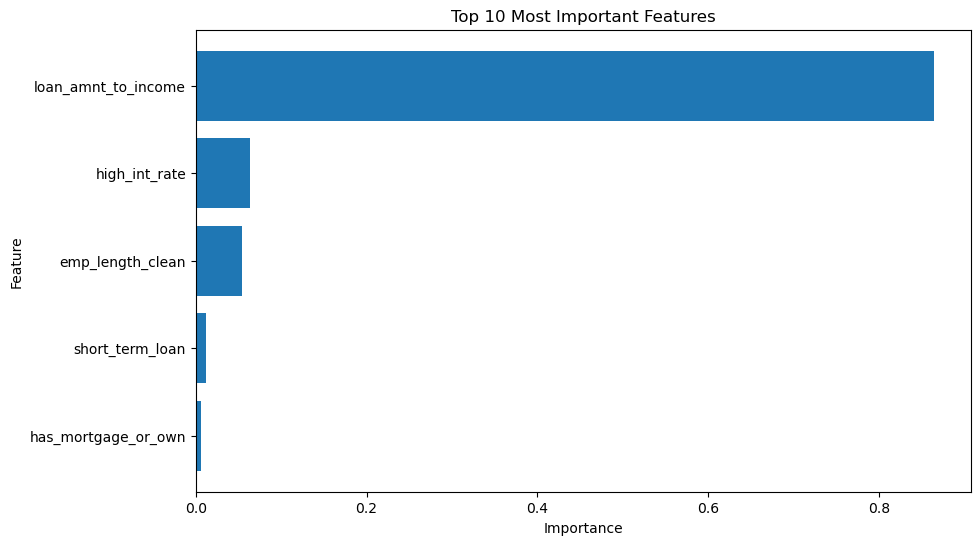

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

#  Features and Importance 
importances = model.feature_importances_
feature_names = X_train.columns

# Put in a DataFrame and sort
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Show the top 10
plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'][:10], feat_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Here we have insight into the thinking of our model.  In this we can see that the overall importance of our features buts a heavy bias on Loan Amount to income.  I will stop here but we could focus on adding more featues from our data set or focusing on differing models and tuning. 

In [1]:
import sqlite3

# Database File Connection 
conn = sqlite3.connect('lendingclub.db')  

# Dataframe 
df.to_sql('loans', conn, if_exists='replace', index=False)

# Close 
conn.close()

NameError: name 'df' is not defined